In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
atussum = pd.read_csv('data/atussum_2014.dat') 


In [83]:
corr = atussum.corr()
atussum.rename(columns={'TEAGE':'Age', 'TESEX':'Sex', 'tucaseid':'ID', 't050101':'working', 't010101':'sleeping'}, inplace=True)
w_data = atussum[atussum.Sex == 2]
yw_data = w_data[w_data.Age < 26]
m_data = atussum[atussum.Sex == 1]
ym_data = m_data[m_data.Age <26]
om_data = m_data[m_data.Age > 45]
ow_data = w_data[w_data.Age > 45]

11% of women under 25 reported spending time taking classes


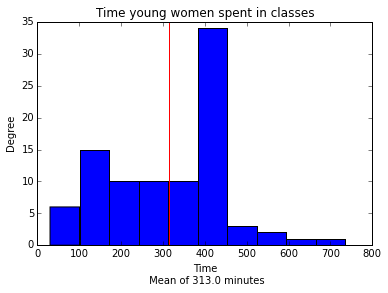

In [99]:
yw_class = round(len(yw_data['t060101'].unique())/len(yw_data['t060101'])*100)
print("{}% of women under 25 reported spending time taking classes".format(yw_class))
yw_class = yw_data[yw_data['t060101'] > 0]
yw_class_mean = yw_class['t060101'].mean()
yw_class['t060101'].plot(kind='hist', title='Time young women spent in classes')
plt.xlabel("Time\n Mean of {} minutes".format(round(yw_class_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_class_mean, 0, ymax, color='red')
plt.show()

12% of men under 25 reported spending time taking classes


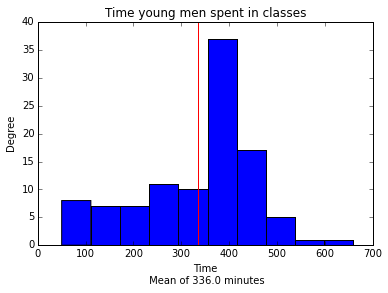

In [94]:
ym_class = round(len(ym_data['t060101'].unique())/len(ym_data['t060101'])*100)
print("{}% of men under 25 reported spending time taking classes".format(ym_class))
ym_class = ym_data[ym_data['t060101'] > 0]
ym_class_mean = ym_class['t060101'].mean()
ym_classes_mean = ym_class['t060101'].mean()
ym_class['t060101'].plot(kind='hist', title='Time young men spent in classes')
plt.xlabel("Time\n Mean of {} minutes".format(round(ym_class_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_classes_mean, 0, ymax, color='red')
plt.show()

11% of women under 25 reported spending time taking studying


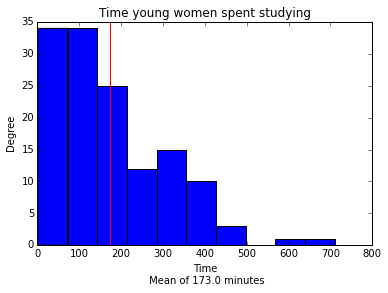

In [67]:
w_study = round(len(yw_data['t060301'].unique())/len(yw_data['t060301'])*100)
print("{}% of women under 25 reported spending time taking studying".format(w_study))
yw_study = yw_data[yw_data['t060301'] > 0]
yw_studying_mean = yw_study['t060301'].mean()
yw_study['t060301'].plot(kind='hist', title='Time young women spent studying')
plt.xlabel("Time\n Mean of {} minutes".format(round(yw_studying_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_studying_mean, 0, ymax, color='red')
plt.show()

7% of men under 25 reported spending time taking studying


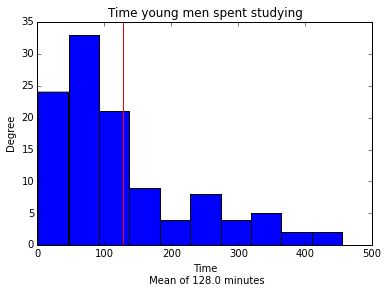

In [65]:
m_study = round(len(ym_data['t060301'].unique())/len(ym_data['t060301'])*100)
print("{}% of men under 25 reported spending time taking studying".format(m_study))
ym_study = ym_data[ym_data['t060301'] > 0]
ym_studying_mean = ym_study['t060301'].mean()
ym_study['t060301'].plot(kind='hist', title='Time young men spent studying')
plt.xlabel("Time\n Mean of {} minutes".format(round(ym_studying_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_studying_mean, 0, ymax, color='red')
plt.show()

9% of women under 25 reported spending time taking care of household children


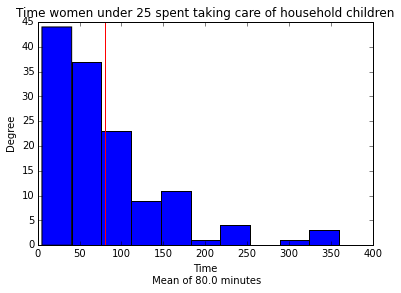

In [104]:
yw_children = round(len(yw_data['t030101'].unique())/len(yw_data['t030101'])*100)
print("{}% of women under 25 reported spending time taking care of household children".format(yw_children))
yw_children = yw_data[yw_data['t030101'] > 0]
yw_children_mean = yw_children['t030101'].mean()
yw_children['t030101'].plot(kind='hist', title='Time women under 25 spent taking care of household children')
plt.xlabel("Time\n Mean of {} minutes".format(round(yw_children_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_children_mean, 0, ymax, color='red')
plt.show()

3% of men under 25 reported spending time taking care of household children


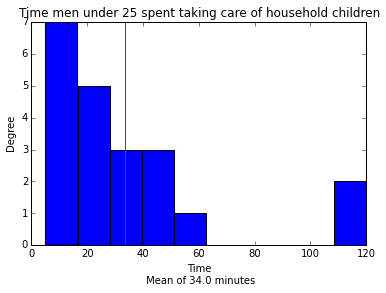

In [103]:
ym_children = round(len(ym_data['t030101'].unique())/len(ym_data['t030101'])*100)
print("{}% of men under 25 reported spending time taking care of household children".format(ym_children))
ym_children = ym_data[ym_data['t030101'] > 0]
ym_children_mean = ym_children['t030101'].mean()
ym_children['t030101'].plot(kind='hist', title='Time men under 25 spent taking care of household children')
plt.xlabel("Time\n Mean of {} minutes".format(round(ym_children_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_children_mean, 0, ymax, color='red')
plt.show()

2% of women reported spending time grooming


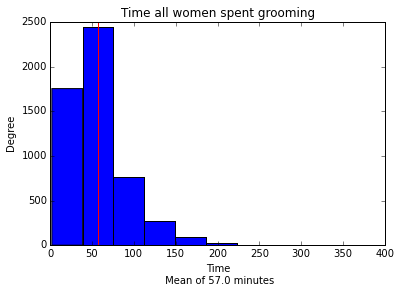

In [87]:
w_groom = round(len(w_data['t010201'].unique())/len(w_data)*100)
print("{}% of women reported spending time grooming".format(w_groom))
w_grooming = w_data[w_data['t010201'] > 0]
w_grooming_mean = w_grooming['t010201'].mean()
w_grooming['t010201'].plot(kind='hist', title='Time all women spent grooming')
plt.xlabel("Time\n Mean of {} minutes".format(round(w_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(w_grooming_mean, 0, ymax, color='red')
plt.show()

2% of men reported spending time grooming


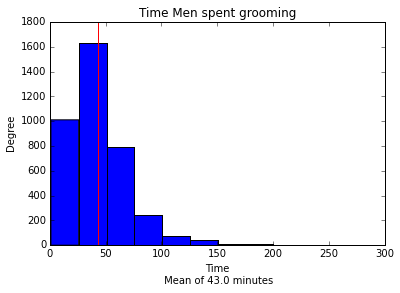

In [97]:
m_groom = round(len(m_data['t010201'].unique())/len(m_data)*100)
print("{}% of men reported spending time grooming".format(m_groom))
m_grooming = m_data[m_data['t010201'] > 0]
m_grooming_mean = m_grooming['t010201'].mean()
m_grooming['t010201'].plot(kind='hist', title='Time Men spent grooming')
plt.xlabel("Time\n Mean of {} minutes".format(round(m_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(m_grooming_mean, 0, ymax, color='red')
plt.show()

9% of women under 25 reported spending time grooming


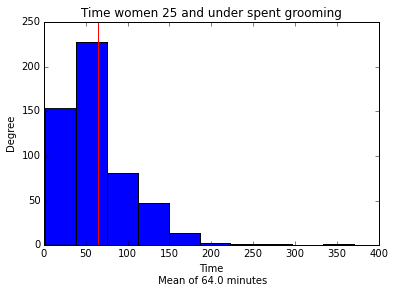

In [90]:
yw_groom = round(len(yw_data['t010201'].unique())/len(yw_data)*100)
print("{}% of women under 25 reported spending time grooming".format(yw_groom))
yw_grooming = yw_data[yw_data['t010201'] > 0]
yw_grooming_mean = yw_grooming['t010201'].mean()
yw_grooming['t010201'].plot(kind='hist', title='Time women 25 and under spent grooming')
plt.xlabel("Time\n Mean of {} minutes".format(round(yw_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_grooming_mean, 0, ymax, color='red')
plt.show()

9% of men under 25 reported spending time grooming


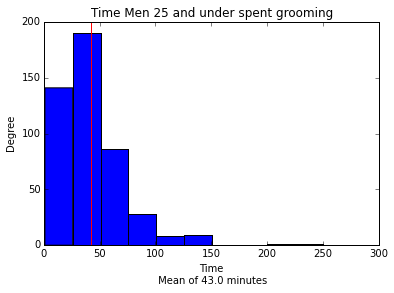

In [96]:
ym_groom = round(len(ym_data['t010201'].unique())/len(ym_data)*100)
print("{}% of men under 25 reported spending time grooming".format(ym_groom))
ym_grooming = ym_data[ym_data['t010201'] > 0]
ym_grooming_mean = ym_grooming['t010201'].mean()
ym_grooming['t010201'].plot(kind='hist', title='Time Men 25 and under spent grooming')
plt.xlabel("Time\n Mean of {} minutes".format(round(ym_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_grooming_mean, 0, ymax, color='red')
plt.show()